In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
# Set the random seed for reproducibility
np.random.seed(42)

# Create larger datasets for each category
safe_posts = ["I love learning new things!" for _ in range(2000)] + ["Had a great day with friends!" for _ in range(2000)]
neutral_posts = ["The weather is okay today." for _ in range(1500)] + ["Just another regular day at work." for _ in range(1500)]
harmful_posts = ["I hate everyone in my class." for _ in range(1000)] + ["This place is awful!" for _ in range(1000)]

# Create DataFrame for each category
safe_data = pd.DataFrame({"textID": np.arange(1, len(safe_posts)+1), "text": safe_posts, "selected_text": safe_posts, "sentiment": ["positive"]*len(safe_posts)})
neutral_data = pd.DataFrame({"textID": np.arange(len(safe_posts)+1, len(safe_posts)+len(neutral_posts)+1), "text": neutral_posts, "selected_text": neutral_posts, "sentiment": ["neutral"]*len(neutral_posts)})
harmful_data = pd.DataFrame({"textID": np.arange(len(safe_posts)+len(neutral_posts)+1, len(safe_posts)+len(neutral_posts)+len(harmful_posts)+1), "text": harmful_posts, "selected_text": harmful_posts, "sentiment": ["negative"]*len(harmful_posts)})

# Combine all into one large dataset
data = pd.concat([safe_data, neutral_data, harmful_data], ignore_index=True)


In [ ]:
# Display the first few rows
print("Number of rows in the combined dataset:", len(data))
print("Number of unique posts per sentiment:")
print(data['sentiment'].value_counts())

Number of rows in the combined dataset: 9000
Number of unique posts per sentiment:
sentiment
positive    4000
neutral     3000
negative    2000
Name: count, dtype: int64


In [ ]:
# Preprocess the text (remove special characters, lowercase text)
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove non-alphabetical characters
    return text

In [ ]:
# Apply preprocessing to the text column
data['cleaned_text'] = data['text'].apply(preprocess_text)

In [ ]:
# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(data['cleaned_text'])

In [ ]:
# Target variable: Assign labels to safe, neutral, and harmful content
# Safe=0, Neutral=1, Harmful=2
y = np.concatenate([np.zeros(4000), np.ones(3000), np.full(2000, 2)])

In [ ]:
# Ensure that the lengths of X and y are consistent
print(f"Length of X: {X.shape[0]}, Length of y: {len(y)}")

Length of X: 9000, Length of y: 9000


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the number of samples in each set
print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")


Training set size: 6300, Test set size: 2700


In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [ ]:
# 1. Clustering with K-Means
n_clusters = 3  # We know we have 3 categories (safe, neutral, harmful)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_train)  # Use training data for clustering

KMeans(n_clusters=3, random_state=42)

In [ ]:
# Get the predicted cluster labels
cluster_labels = kmeans.labels_

In [ ]:
# 2. Calculate Silhouette Score to evaluate the clustering quality
sil_score = silhouette_score(X_train, cluster_labels)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.5656


In [ ]:
# 3. Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train.toarray())  # Convert sparse matrix to dense for PCA

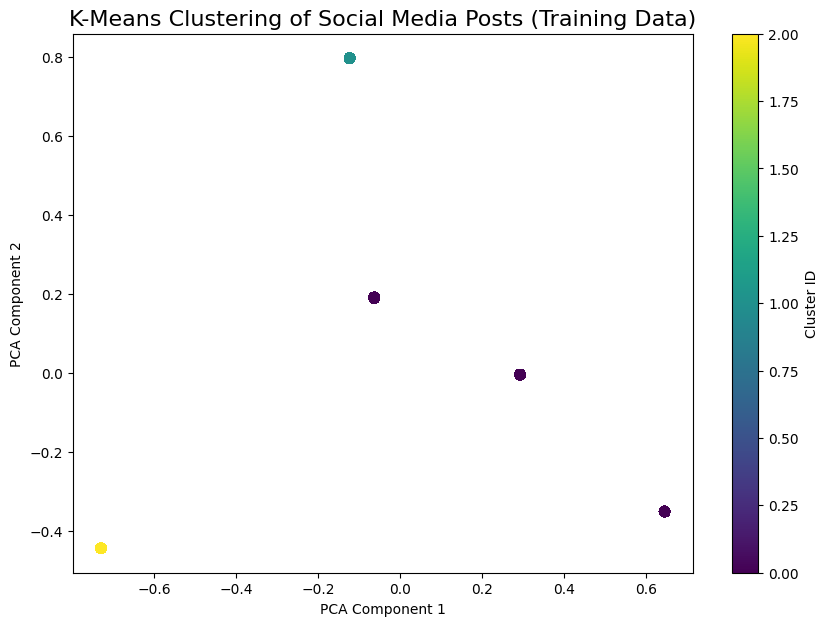

In [ ]:
# 4. Visualize the clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title("K-Means Clustering of Social Media Posts (Training Data)", fontsize=16)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster ID')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


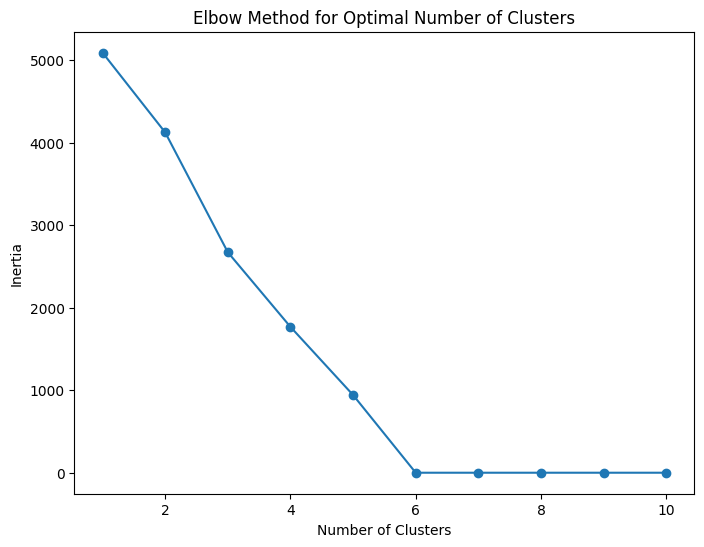

In [ ]:
# 5.Inertia Plot to find the optimal number of clusters (Elbow Method)
inertia = [KMeans(n_clusters=i, random_state=42).fit(X_train).inertia_ for i in range(1, 11)]
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering


In [ ]:

# 1. DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can adjust eps and min_samples for tuning
dbscan_labels = dbscan.fit_predict(X_train.toarray())  # Convert sparse matrix to dense for DBSCAN

In [ ]:
# Evaluate DBSCAN using silhouette score (ignore noise points if any)
dbscan_sil_score = silhouette_score(X_train, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
print(f"DBSCAN Silhouette Score: {dbscan_sil_score:.4f}")

DBSCAN Silhouette Score: 1.0000


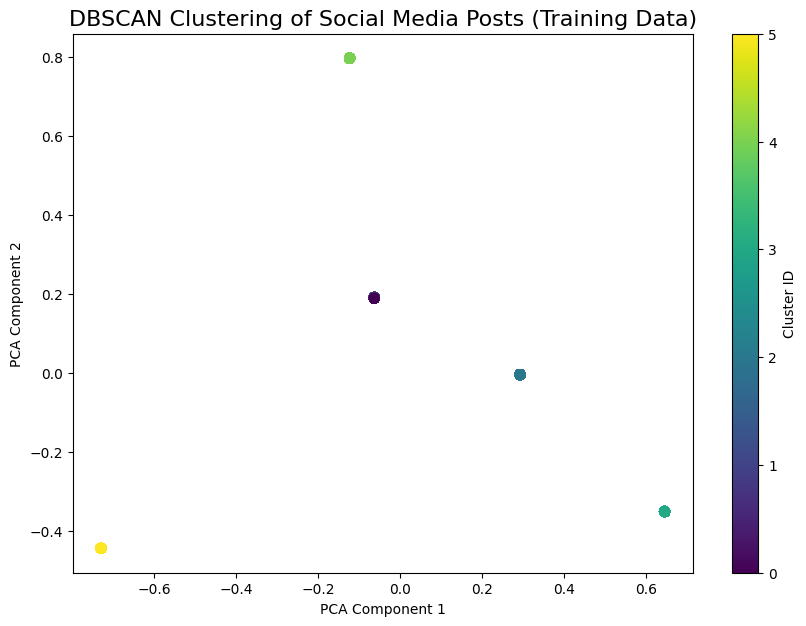

In [ ]:
# Visualize DBSCAN results
X_pca_dbscan = PCA(n_components=2).fit_transform(X_train.toarray())  # PCA for visualization
plt.figure(figsize=(10, 7))
plt.scatter(X_pca_dbscan[:, 0], X_pca_dbscan[:, 1], c=dbscan_labels, cmap='viridis', s=50)
plt.title("DBSCAN Clustering of Social Media Posts (Training Data)", fontsize=16)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster ID')
plt.show()


In [ ]:
#  Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=3)  # Setting n_clusters=3 for positive, neutral, harmful
agg_clust_labels = agg_clust.fit_predict(X_train.toarray())  # Convert sparse matrix to dense for Agglomerative


In [ ]:
# Evaluate Agglomerative Clustering using silhouette score
agg_sil_score = silhouette_score(X_train, agg_clust_labels)
print(f"Agglomerative Clustering Silhouette Score: {agg_sil_score:.4f}")

Agglomerative Clustering Silhouette Score: 0.5764


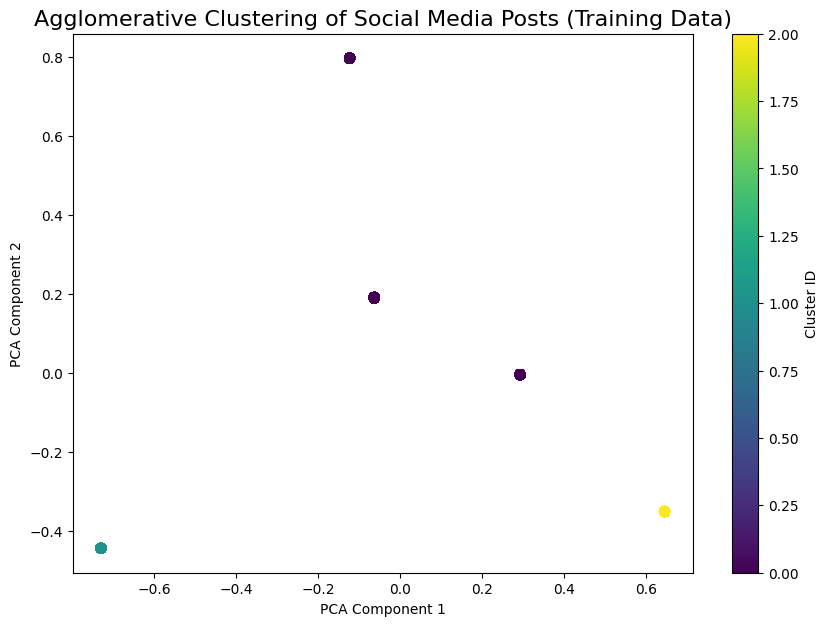

In [ ]:
# Visualize Agglomerative Clustering results
X_pca_agg = PCA(n_components=2).fit_transform(X_train.toarray())  # PCA for visualization
plt.figure(figsize=(10, 7))
plt.scatter(X_pca_agg[:, 0], X_pca_agg[:, 1], c=agg_clust_labels, cmap='viridis', s=50)
plt.title("Agglomerative Clustering of Social Media Posts (Training Data)", fontsize=16)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster ID')
plt.show()


In [ ]:
# Convert X_train to a dense array for Agglomerative Clustering
X_train_dense = X_train.toarray()

In [ ]:

# Fit the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_train)

In [ ]:

# Fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_train_dense)

In [ ]:
# Fit the Agglomerative Clustering model
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(X_train_dense)

In [ ]:
# Evaluate the models using Silhouette Score
silhouette_kmeans = silhouette_score(X_train_dense, kmeans_labels)
silhouette_dbscan = silhouette_score(X_train_dense, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1  # DBSCAN may have noise (-1)
silhouette_agg = silhouette_score(X_train_dense, agg_labels)

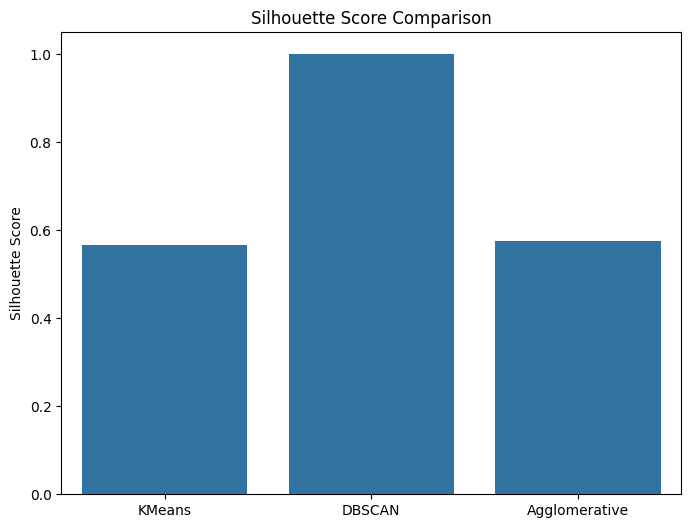

In [ ]:
import seaborn as sns
# Create a bar plot to compare the Silhouette Scores
plt.figure(figsize=(8, 6))
sns.barplot(x=['KMeans', 'DBSCAN', 'Agglomerative'], y=[silhouette_kmeans, silhouette_dbscan, silhouette_agg])
plt.title('Silhouette Score Comparison')
plt.ylabel('Silhouette Score')
plt.show()


In [ ]:
# Visualize the clustering results using PCA (2D projection of high-dimensional data)
# Reduce dimensions to 2 for visualization using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_dense)  # Using dense array for PCA

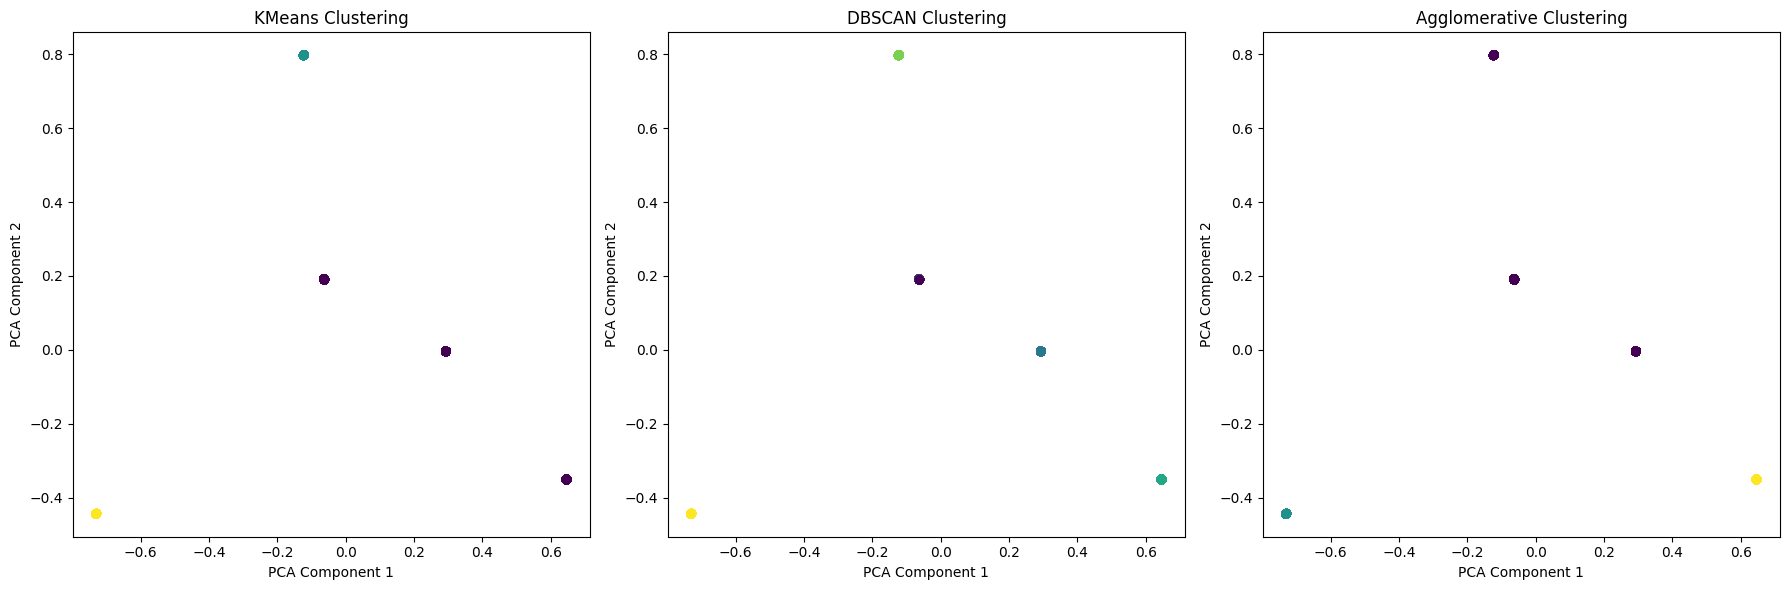

In [ ]:

# Plot the results of each model
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
# KMeans Visualization
axs[0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeans_labels, cmap='viridis')
axs[0].set_title('KMeans Clustering')
axs[0].set_xlabel('PCA Component 1')
axs[0].set_ylabel('PCA Component 2')

# DBSCAN Visualization (DBSCAN assigns noise points to -1, we'll color them differently)
axs[1].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=dbscan_labels, cmap='viridis')
axs[1].set_title('DBSCAN Clustering')
axs[1].set_xlabel('PCA Component 1')
axs[1].set_ylabel('PCA Component 2')

# Agglomerative Clustering Visualization
axs[2].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=agg_labels, cmap='viridis')
axs[2].set_title('Agglomerative Clustering')
axs[2].set_xlabel('PCA Component 1')
axs[2].set_ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

In [ ]:
# Print Silhouette Scores and Inertia for KMeans
print(f"Silhouette Scores:\nKMeans: {silhouette_kmeans}\nDBSCAN: {silhouette_dbscan}\nAgglomerative: {silhouette_agg}")
print(f"Inertia (KMeans): {inertia_kmeans}")


Silhouette Scores:
KMeans: 0.5655833333610426
DBSCAN: 0.9999999963217386
Agglomerative: 0.5763889264008177
Inertia (KMeans): 2671.2248431390212


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Davies-Bouldin Index for KMeans
kmeans_dbi = davies_bouldin_score(X_train.toarray(), kmeans_labels)

# Davies-Bouldin Index for DBSCAN
dbscan_dbi = davies_bouldin_score(X_train.toarray(), dbscan_labels)

# Davies-Bouldin Index for Agglomerative
agg_dbi = davies_bouldin_score(X_train.toarray(), agg_labels)

# Print Davies-Bouldin Index
print(f"KMeans Davies-Bouldin Index: {kmeans_dbi}")
print(f"DBSCAN Davies-Bouldin Index: {dbscan_dbi}")
print(f"Agglomerative Davies-Bouldin Index: {agg_dbi}")


KMeans Davies-Bouldin Index: 0.718872007255405
DBSCAN Davies-Bouldin Index: 1.4231659543974146e-08
Agglomerative Davies-Bouldin Index: 0.7880152269627326


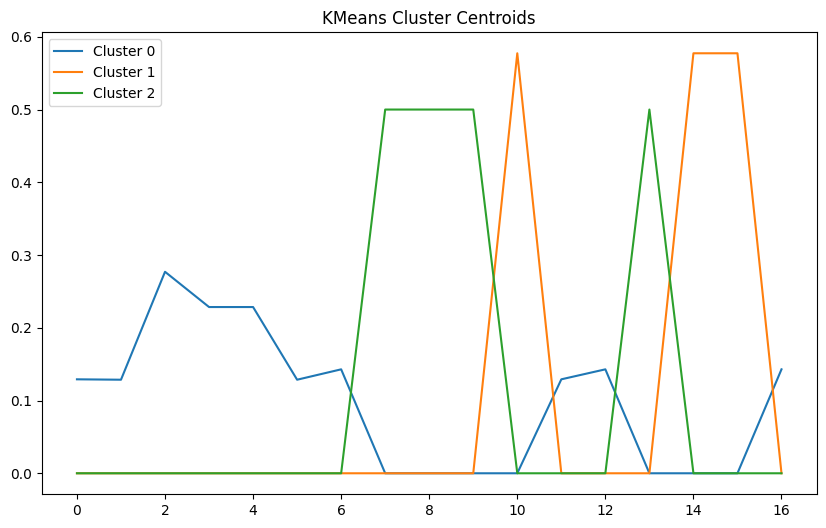

In [ ]:
# Plot cluster centroids for KMeans
centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 6))
for i in range(centroids.shape[0]):
    plt.plot(centroids[i], label=f"Cluster {i}")
plt.title("KMeans Cluster Centroids")
plt.legend()
plt.show()

In [ ]:
from collections import Counter
import numpy as np

# Get the terms (e.g., TF-IDF features)
terms = vectorizer.get_feature_names_out()

# For each cluster, get the top 10 terms
for i in range(len(np.unique(kmeans_labels))):
    cluster_terms = X_train[kmeans_labels == i]
    sum_terms = np.asarray(cluster_terms.sum(axis=0)).flatten()
    term_freq = dict(zip(terms, sum_terms))
    most_common_terms = Counter(term_freq).most_common(10)

    print(f"Cluster {i}: {most_common_terms}")

Cluster 0: [('day', 1070.5788515683703), ('friends', 883.2279838659293), ('great', 883.2279838659293), ('just', 552.2600718484503), ('regular', 552.2600718484503), ('work', 552.2600718484503), ('awful', 499.21738751770596), ('place', 499.21738751770596), ('class', 497.0960671741463), ('hate', 497.0960671741463)]
Cluster 1: [('okay', 612.5686356102074), ('today', 612.5686356102074), ('weather', 612.5686356102074), ('awful', 0.0), ('class', 0.0), ('day', 0.0), ('friends', 0.0), ('great', 0.0), ('hate', 0.0), ('just', 0.0)]
Cluster 2: [('learning', 687.0), ('love', 687.0), ('new', 687.0), ('things', 687.0), ('awful', 0.0), ('class', 0.0), ('day', 0.0), ('friends', 0.0), ('great', 0.0), ('hate', 0.0)]


In [ ]:
print("Unique KMeans Labels:", set(kmeans_labels))
print("Unique DBSCAN Labels:", set(dbscan_labels))
print("Unique Agglomerative Labels:", set(agg_labels))


Unique KMeans Labels: {0, 1, 2}
Unique DBSCAN Labels: {0, 1, 2, 3, 4, 5}
Unique Agglomerative Labels: {0, 1, 2}


In [ ]:
# Define sentiment map (ensure it matches your clusters)
sentiment_map = {0: 'Safe', 1: 'Neutral', 2: 'Harmful'}

# Map each cluster label to a sentiment, including error handling for labels not in the map
def map_labels_to_sentiment(labels, sentiment_map):
    mapped_sentiments = []
    for label in labels:
        # Fallback if label is not in sentiment_map
        sentiment = sentiment_map.get(label, 'Unknown')  # Use 'Unknown' if label is not in the map
        mapped_sentiments.append(sentiment)
    return mapped_sentiments

# Apply the function to all cluster labels
kmeans_sentiment = map_labels_to_sentiment(kmeans_labels, sentiment_map)
dbscan_sentiment = map_labels_to_sentiment([label for label in dbscan_labels if label != -1], sentiment_map)  # Skip noise points (-1)
agg_sentiment = map_labels_to_sentiment(agg_labels, sentiment_map)

# Print sample outputs to verify
print("KMeans Sentiment:", kmeans_sentiment[:5])  # Check first 5 labels
print("DBSCAN Sentiment:", dbscan_sentiment[:5])  # Check first 5 labels
print("Agglomerative Sentiment:", agg_sentiment[:5])  # Check first 5 labels


KMeans Sentiment: ['Safe', 'Safe', 'Safe', 'Safe', 'Safe']
DBSCAN Sentiment: ['Safe', 'Neutral', 'Harmful', 'Harmful', 'Unknown']
Agglomerative Sentiment: ['Safe', 'Safe', 'Safe', 'Safe', 'Harmful']


In [ ]:
from scipy.sparse import csr_matrix

if isinstance(X_train, csr_matrix):
    X_train = X_train.toarray()  # Convert sparse matrix to dense format


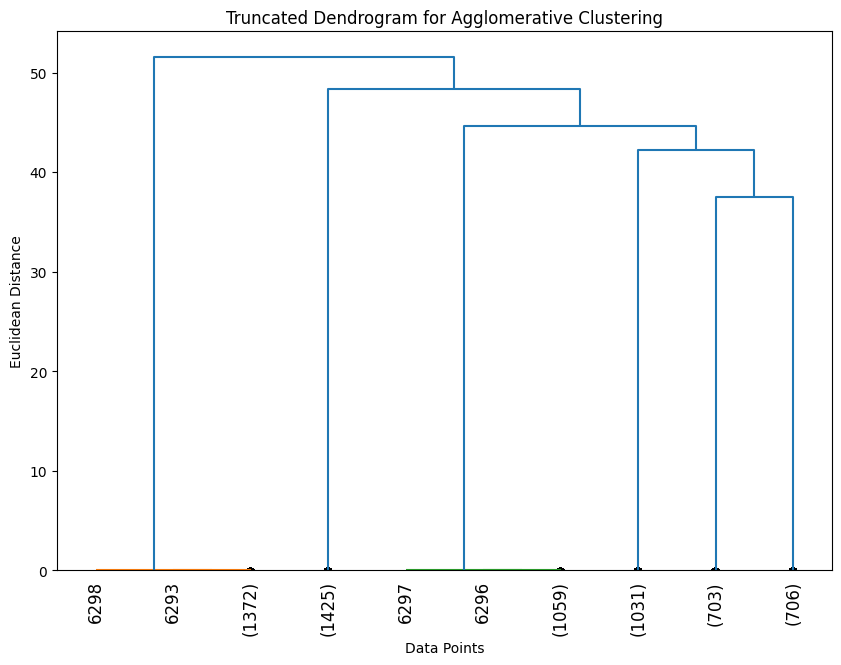

In [ ]:
import sys
sys.setrecursionlimit(5000)  # Temporarily increase recursion limit

# Truncated dendrogram for visualization
plt.figure(figsize=(10, 7))
plt.title("Truncated Dendrogram for Agglomerative Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")

dendrogram(linkage_matrix, truncate_mode='lastp', p=10, leaf_rotation=90., leaf_font_size=12., show_contracted=True)

plt.show()


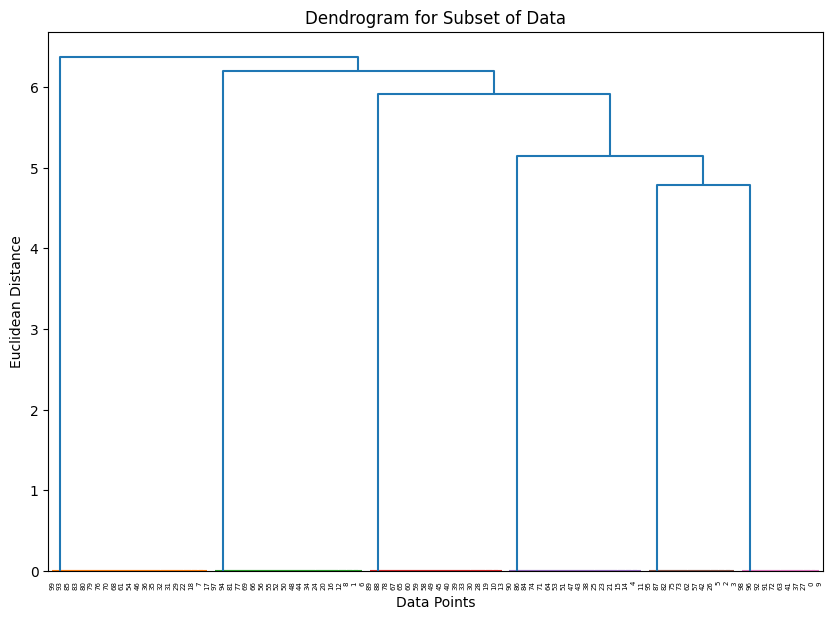

In [ ]:
# Select a subset for dendrogram visualization
subset = X_train[:100]  # Select 100 samples (adjust as needed)
linkage_matrix_subset = linkage(subset, method='ward')

plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Subset of Data")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")

dendrogram(linkage_matrix_subset)

plt.show()


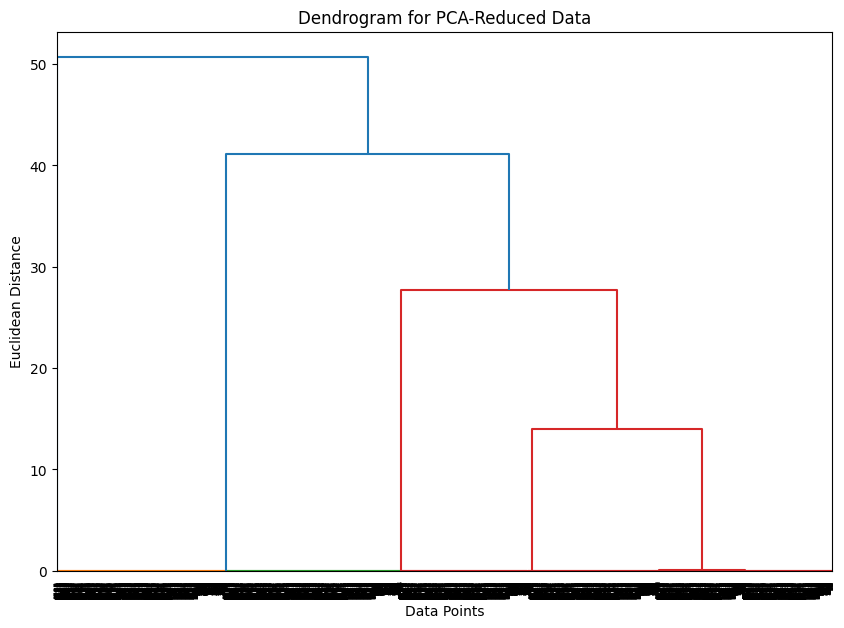

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensionality to 2 for easier visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)

# Create linkage matrix with reduced dimensions
linkage_matrix_reduced = linkage(X_reduced, method='ward')

plt.figure(figsize=(10, 7))
plt.title("Dendrogram for PCA-Reduced Data")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")

dendrogram(linkage_matrix_reduced)

plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = agg_clustering.fit_predict(X_train)

print("Cluster labels:", labels)


Cluster labels: [0 0 0 ... 0 1 0]
